In [39]:
from netCDF4 import Dataset
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from osgeo import gdal
import h5py
import pandas as pd
import joblib
from scipy.stats import pearsonr
from scipy.interpolate import interpn
from scipy.stats import gaussian_kde, pearsonr

In [4]:
base_dir= '/Users/hydrosou/Documents/NOAA18/AMSU_GROUND_MERGE_CORRECTED_2'
NOAA18 = base_dir+'/*.nc'

In [117]:
pd.to_datetime('13145', format="%y%j")

Timestamp('2013-05-25 00:00:00')

In [175]:
h5= h5py.File('event2_130390917.h5')

/home/ZhiLi/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [194]:
rows,cols= np.where(h5['c1_amsua'][:]>0)

In [94]:
def postProcess(h5):
    rows, cols= np.where(h5['c1_amsua'][:]>0)
    df= pd.DataFrame()
    for key in h5.keys():
        if key != 'aver_precip_mask':
            arr= np.array(h5[key][:])
            df[key]= arr[rows, cols]
    
    df['angle']= np.array([i for i in range(25, 89)]*64).reshape(64,64)[rows, cols]
    df['diurnal']= 9
    df['month']=5
    
    return df

In [95]:
df= postProcess(h5)

In [96]:
X= df.loc[:, ['c1_amsua', 'c2_amsua', 'c15_amsua','c1_amsub', 'c2_amsub','c3_amsub',
             'c4_amsub', 'c5_amsub', 'VI', 'VC', 'VM', 'VX', 'surface', 'dem', 'lons', 'lats',
             'angle', 'diurnal']]
y= df.aver_precip_nssl.values

In [18]:
randomforestCls= joblib.load('randomforestClassifier.pkl')
randomforestReg= joblib.load('randomforestRegressor.pkl')

In [97]:
X= X.astype(float)

In [100]:
sim_cls= randomforestCls.predict(X)
X['sim_classes']= sim_cls

In [99]:
X.drop('sim_classes', axis=1, inplace=True)

In [101]:
sim_y= randomforestReg.predict(X)

In [102]:
df['sim_y']= sim_y

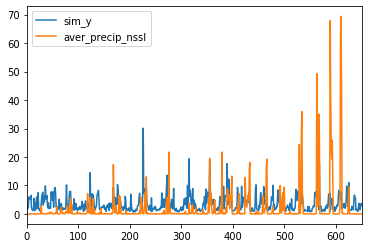

In [103]:
df.loc[:,['sim_y','aver_precip_nssl']].plot()

In [112]:
df

,VC,VI,VM,VX,aver_precip_nssl,c15_amsua,c1_amsua,c1_amsub,c2_amsua,c2_amsub,...,c5_amsub,dem,lats,lons,rr_amsub,surface,angle,diurnal,month,sim_y
0,248.000,83.125,-133.0,516.0,0.0,26956.0,26491.0,26996.0,26410.0,27094.0,...,26610.0,324.0,43.1,-92.8,0.0,12.0,57,9,5,2.108369
1,130.875,59.250,-240.0,276.0,0.0,26956.0,26491.0,26756.0,26410.0,26746.0,...,26172.0,311.0,43.1,-93.0,0.0,12.0,58,9,5,1.783972
2,123.375,56.250,-1093.0,311.0,0.0,26956.0,26491.0,26090.0,26410.0,25089.0,...,25026.0,310.0,43.0,-92.8,8.0,12.0,57,9,5,1.891694
3,0.000,0.000,-1608.0,0.0,0.0,26956.0,26491.0,25719.0,26410.0,24169.0,...,23833.0,321.0,43.0,-93.0,11.0,12.0,58,9,5,2.333775
4,82.125,463.875,-1804.0,500.0,0.0,26956.0,26491.0,25668.0,26410.0,23897.0,...,23891.0,345.0,43.0,-93.3,14.0,12.0,59,9,5,5.992694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,173.875,226.000,-713.0,697.0,0.0,27108.0,26985.0,26242.0,26886.0,25388.0,...,25156.0,163.0,39.0,-91.0,8.0,12.0,42,9,5,3.161896
647,60.375,98.625,-890.0,165.0,0.0,27108.0,26985.0,26358.0,26886.0,25874.0,...,25697.0,216.0,39.0,-91.2,6.0,14.0,43,9,5,1.447745
648,60.000,216.375,-1902.0,217.0,0.0,28442.0,28261.0,26355.0,28295.0,25349.0,...,24377.0,377.0,39.8,-96.9,14.0,12.0,70,9,5,3.125956
649,7.625,207.750,-2054.0,217.0,0.0,28442.0,28261.0,25972.0,28295.0,25155.0,...,24306.0,429.0,39.8,-97.2,17.0,12.0,71,9,5,3.668457


In [ ]:
df.loc[: ['sim_classes', '']]

In [104]:
ysimTrain= sim_y
ytrain= df.aver_precip_nssl
ysimTest= df.rr_amsub
ytest= df.aver_precip_nssl

In [105]:
# utilities
def scatter(x,y, axes=None, **figkwargs):
    '''
    Make density scatter plot
    Args:
    ---------------
    :x - numpy.array object (None, 1)
    :y - numpy.array object (None, 1)

    Returns:
    ---------------
    :fig - matplotlib.pyplot object
    :axes - axes for the figure
    
    Example:
    ---------------
    Case 1: produce one graph with one axes
    fig, ax= scatter(x, y)
    
    Case 2: produce multiple axes
    fig= plt.figure()
    ax1= fig.add_subplot(121)
    scatter(x1,y1,ax1)
    ax2= fig.add_subplot(122)
    scatter(x2,y2,ax2)
    
    '''

    _max= max(x.max(), y.max())
    _min= min(x.min(), y.min())
    if axes is None:
        fig= plt.figure()
        axes= fig.add_subplot()
    else:
        fig= plt.gcf()
    data, x_e, y_e= np.histogram2d(x, y, bins=10)
    z= interpn( ( 0.5*(x_e[1:] + x_e[:-1]) , 0.5*(y_e[1:]+y_e[:-1]) ) ,
        data , np.vstack([x,y]).T , method = "splinef2d", bounds_error = False )
    idx= z.argsort() #move high density forward
    x, y, z= x[idx], y[idx], z[idx]
    ax= axes.scatter(x, y, c= z, s=200, edgecolor= '', cmap='jet', **figkwargs)
    axes.set_aspect('equal', 'box')
    axes.plot([_min, _max],[_min, _max], c='r')
    axes.set_xlim([_min, _max])
    axes.set_ylim([_min, _max])    
    cb= plt.colorbar(orientation='vertical', mappable=ax, shrink=.7)

    return fig, axes

def rmse(x,y):
    return ((((x-y)**2).sum())/len(x))**.5

def r(x,y):
    return pearsonr(x, y)[0]

def mae(x,y):
    return (np.abs(x-y).sum())/len(x)

def bias(x,y):
    return (x-y).sum()/y.sum()*100

def makeTrainTestData(X, y, **kwargs):
    Xtrain, Xtest, ytrain, ytest= train_test_split(X, y, test_size=.3, random_state=3, **kwargs)
    
    return Xtrain, Xtest, ytrain, ytest

def colordensityPlot(ysimTrain, ysimTest, ytrain, ytest):
    fig = plt.figure(figsize=(12,6))
    ax= fig.add_subplot(121)
    fig, ax= scatter(ysimTrain, ytrain, ax)
    ax.set_xlabel('Predicted (mm/h)')
    ax.set_ylabel('Reference (mm/h)')
    ax.text(0.5,0.6, 'RMSE: %.2f mm/h\nCC: %.2f'%(rmse(ysimTrain, ytrain), pearsonr(ysimTrain, ytrain)[0]),
           transform=ax.transAxes)
    ax= fig.add_subplot(122)
    fig, ax= scatter(ysimTest, ytest, ax)
    ax.set_xlabel('Predicted (mm/h)')
    ax.set_ylabel('Reference (mm/h)')
    ax.text(0.5,0.6, 'RMSE: %.2f mm/h\nCC: %.2f'%(rmse(ysimTest, ytest), pearsonr(ysimTest, ytest)[0]),
           transform=ax.transAxes)
    
    return fig, ax

ValueError: operands could not be broadcast together with shapes (64,64) (651,) 

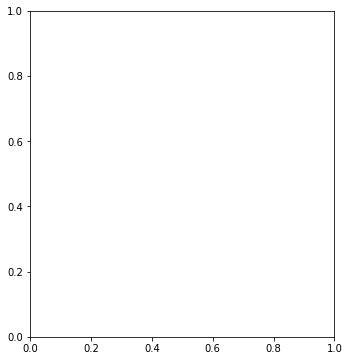

In [92]:
fig = plt.figure(figsize=(12,6))
ax= fig.add_subplot(121)
fig, ax= scatter(ytrain, ysimTrain, ax)
ax.set_xlabel('Reference (ln(mm/h)')
ax.set_ylabel('Predicted (ln(mm/h)')
ax.text(0.1,1.02, 'BIAS: %.2f'%bias(ysimTrain, ytrain)+'%'+'\nMAE: %.2f mm/h\nRMSE: %.2f mm/h\nCC: %.2f'%(
         mae(ysimTrain, ytrain), rmse(ysimTrain, ytrain), pearsonr(ysimTrain, ytrain)[0]),
       transform=ax.transAxes)
ax= fig.add_subplot(122)
fig, ax= scatter(ytest, ysimTest, ax)
ax.set_xlabel('Reference (mm/h)')
ax.set_ylabel('Predicted (mm/h)')
ax.text(0.05,1.02, 'BIAS: %.2f'%bias(ysimTest, ytest)+'%'+'\nMAE: %.2f mm/h\nRMSE: %.2f mm/h\nCC: %.2f'%(
        mae(ysimTest, ytest), rmse(ysimTest, ytest), pearsonr(ysimTest, ytest)[0]),
       transform=ax.transAxes)

In [184]:
sim_field= np.zeros((64,64))
sim_field[rows,cols]=ysimTrain
ytrain= h5['aver_precip_nssl'][:]

/home/ZhiLi/env/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


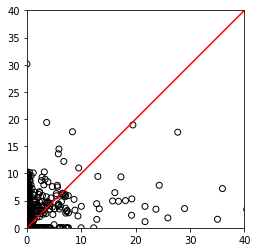

In [107]:
plt.scatter(ytrain.reshape(-1,1), sim_field.reshape(-1,1), color='', edgecolor='k')
plt.axes().set_aspect('equal')
plt.xlim([0,40])
plt.ylim([0,40])
plt.plot([0,40], [0,40], color='r')

In [192]:
h5['c1_amsua'][:]

array([[20282., 20282., 20282., ..., 25915., 25915., 25757.],
       [20958., 20958., 20958., ..., 25527., 25527., 25566.],
       [20958., 20958., 20958., ..., 25527., 25527., 25566.],
       ...,
       [20608., 20608., 20608., ..., 25528., 25528., 26247.],
       [20608., 20608., 20608., ..., 25528., 25528., 26247.],
       [20608., 20608., 20608., ..., 25528., 25528., 26247.]])

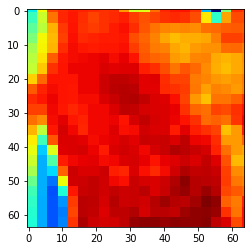

In [193]:
plt.imshow(h5['c1_amsua'][:], cmap='jet')

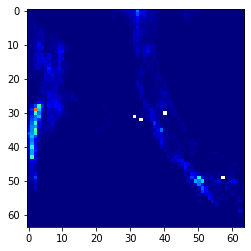

In [185]:
plt.imshow(ytrain, cmap='jet', vmin=0, vmax=40)

In [37]:
np.histogram(df.aver_precip_nssl)

(array([228,  11,   6,   1,   3,   2,   1,   1,   0,   1]),
 array([ 0.        ,  4.6507618 ,  9.30152359, 13.95228539, 18.60304718,
        23.25380898, 27.90457077, 32.55533257, 37.20609436, 41.85685616,
        46.50761795]))

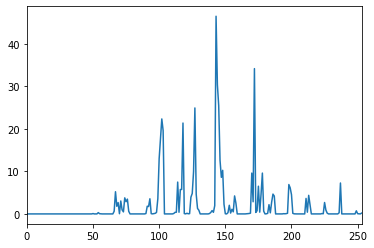

In [31]:
df.aver_precip_nssl.plot()

In [113]:
totaldf= pd.read_csv('updatedDataFrame.csv').drop('Unnamed: 0', axis=1)

In [115]:
totaldf.set_index('date', inplace=True)

In [119]:
import datetime

In [176]:
event= totaldf.loc['2013-02-08',:]

In [177]:
event['sim_cls']= randomforestCls.predict(event.drop([
                                                'time', 'aver_precip_nssl', 'rr_amsub',
                                                'classes', 'month','coasts'
                                                    ], axis=1))

/home/ZhiLi/env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [178]:
event['y_sim']= randomforestReg.predict(event.drop([
                                                'time', 'aver_precip_nssl', 'rr_amsub',
                                                'classes', 'month','coasts'
                                                    ], axis=1))

/home/ZhiLi/env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


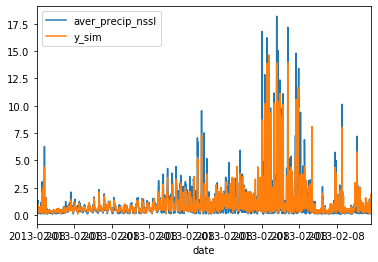

In [179]:
event.loc[:, ['aver_precip_nssl', 'y_sim']].plot()

In [180]:
lons= h5['lons'][:]
lats= h5['lats'][:]
rainField= np.zeros((64,64))
rainCls= np.zeros((64,64))
for m in range(64):
    for n in range(64):
        lon= lons[m, n]
        lat= lats[m, n]
        rain= event.y_sim[(event.lon==lon) & (event.lat==lat)]
        cls= event.sim_cls[(event.lon==lon) & (event.lat==lat)]
        print(rain)
        if len(rain)==1:
            rainField[m,n]= rain
            rainCls[m,n]= cls
        

Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    0.242936
Name: y_sim,

Series([], Name: y_sim, dtype: float64)
date
2013-02-08    0.170302
Name: y_sim, dtype: float64
date
2013-02-08    0.827963
Name: y_sim, dtype: float64
date
2013-02-08    0.968674
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    1.649011
Name: y_sim, dtype: float64
date
2013-02-08    1.080851
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    1.20033
Name: y_sim, dtype: float64
date
2013-02-08    0.924622
Name: y_sim, dtype: float64
date
2013-02-08    0.636674
Name: y_sim, dtype: float64
date
2013-02-08    0.277553
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    0.452757
Name: y_sim, dtype: float64
date
2013-02-08    0.485786
Name: y_sim, dtype: float64
Series([], Name: y_sim, d

Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    0.43003
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    2.355738
Name: y_sim, dtype: float64
date
2013-02-08    1.082116
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    0.647606
Name: y_sim, dtype: float64
date
2013-02-08    1.303392
Name: y_sim, dtype: float64
date
2013-02-08    0.324779
Name: y_sim, dtype: float64
date
2013-02-08    0.514689
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([]

Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    1.096229
Name: y_sim, dtype: float64
date
2013-02-08    2.502549
Name: y_sim, dtype: float64
date
2013-02-08    3.090161
Name: y_sim, dtype: float64
date
2013-02-08    0.593883
Name: y_sim, dtype: float64
date
2013-02-08    2.227996
Name: y_sim, dtype: float64
date
2013-02-08    0.91357
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    2.5306

Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    0.414021
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    0.236748
Name: y_sim, dtype: float64
date
2013-02-08    1.149504
Name: y_sim, dtype: float64
date
2013-02-08    0.556646
Name: y_sim, dtype: float64
date
2013-02-08    0.766958
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    0.468387
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, 

date
2013-02-08    0.978924
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    0.957064
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([

Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    0.737404
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    1.973873
Name: y_sim, dtype: float64
date
2013-02-08    2.129219
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    0.173582
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name:

Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    0.50965
Name: y_sim, dtype: float64
date
2013-02-08    1.670955
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    0.682824
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    0.797434
Name: y_sim, dtype: float64
date
2013-02-08    1.816254
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
S

Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    8.703091
Name: y_sim, dtype: float64
date
2013-02-08    6.282431
Name: y_sim, dtype: float64
date
2013-02-08    3.224723
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    2.972251
Name

Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    0.20557
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    0.771785
Name: y_sim, dtype: float64
Series([]

Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    0.692537
Name: y_sim, dtype: float64
date
2013-02-08    3.012987
Name: y_sim, dtype: float64
date
2013-02-08    1.853149
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    0.622583
Name: y_sim, dtype: float64
date
2013-02-08    0.965022
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)


Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    9.052385
Name: y_sim, dtype: float64
date
2013-02-08    4.028697
Name: y_sim, dtype: float64
date
2013-02-08    1.680369
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    0.372667
Name: y_sim, dtype: float64
date
2013-02-08    0.621214
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)


Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    0.569124
Name: y_sim, dtype: float64
date
2013-02-08    0.739996
Name: y_sim, dtype: float64
date
2013-02-08    0.979341
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: f

Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    2.090437
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, 

Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    1.340385
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    1.789999
Name: y_sim, dtype: float64
date
2013-02-08    1.747643
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    1.534911
Name: y_sim, dtype: float64
date
2013-02-08    0.191724
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    1.054253
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    0.61074
Name: y_sim, dtype: float64
date
2013-02-08    1.077866
Name: y_sim, dtype: f

Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)


Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
date
2013-02-08    1.508674
Name: y_sim, dtype: float64
date
2013-02-08    0.829707
Name: y_sim, dtype: float64
date
2013-02-08    1.349315
Name: y_sim, dtype: float64
date
2013-02-08    0.860586
Name: y_sim, dtype: float64
Series([], Name: y_sim, dtype: float64)
Series([], Name:

Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)


Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)
Series([], Name: y_sim, dtype: float64)


/home/ZhiLi/env/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


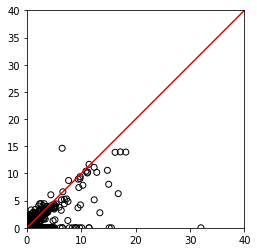

In [187]:
plt.scatter(ytrain.reshape(-1,1), rainField.reshape(-1,1), color='', edgecolor='k')
plt.axes().set_aspect('equal')
plt.xlim([0,40])
plt.ylim([0,40])
plt.plot([0,40], [0,40], color='r')

In [157]:
df

,VC,VI,VM,VX,aver_precip_nssl,c15_amsua,c1_amsua,c1_amsub,c2_amsua,c2_amsub,...,c5_amsub,dem,lats,lons,rr_amsub,surface,angle,diurnal,month,sim_y
0,248.000,83.125,-133.0,516.0,0.0,26956.0,26491.0,26996.0,26410.0,27094.0,...,26610.0,324.0,43.1,-92.8,0.0,12.0,57,9,5,2.108369
1,130.875,59.250,-240.0,276.0,0.0,26956.0,26491.0,26756.0,26410.0,26746.0,...,26172.0,311.0,43.1,-93.0,0.0,12.0,58,9,5,1.783972
2,123.375,56.250,-1093.0,311.0,0.0,26956.0,26491.0,26090.0,26410.0,25089.0,...,25026.0,310.0,43.0,-92.8,8.0,12.0,57,9,5,1.891694
3,0.000,0.000,-1608.0,0.0,0.0,26956.0,26491.0,25719.0,26410.0,24169.0,...,23833.0,321.0,43.0,-93.0,11.0,12.0,58,9,5,2.333775
4,82.125,463.875,-1804.0,500.0,0.0,26956.0,26491.0,25668.0,26410.0,23897.0,...,23891.0,345.0,43.0,-93.3,14.0,12.0,59,9,5,5.992694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,173.875,226.000,-713.0,697.0,0.0,27108.0,26985.0,26242.0,26886.0,25388.0,...,25156.0,163.0,39.0,-91.0,8.0,12.0,42,9,5,3.161896
647,60.375,98.625,-890.0,165.0,0.0,27108.0,26985.0,26358.0,26886.0,25874.0,...,25697.0,216.0,39.0,-91.2,6.0,14.0,43,9,5,1.447745
648,60.000,216.375,-1902.0,217.0,0.0,28442.0,28261.0,26355.0,28295.0,25349.0,...,24377.0,377.0,39.8,-96.9,14.0,12.0,70,9,5,3.125956
649,7.625,207.750,-2054.0,217.0,0.0,28442.0,28261.0,25972.0,28295.0,25155.0,...,24306.0,429.0,39.8,-97.2,17.0,12.0,71,9,5,3.668457


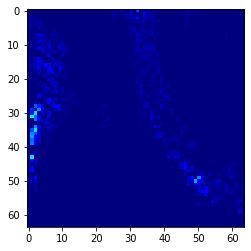

In [182]:
plt.imshow(rainField, vmin=0, vmax=40, cmap='jet')

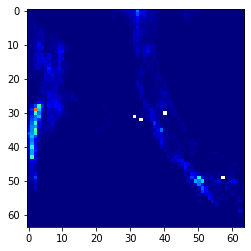

In [186]:
plt.imshow(ytrain, vmin=0, vmax=40, cmap='jet')

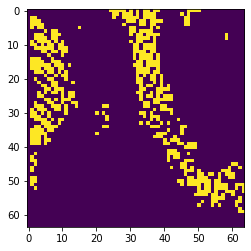

In [188]:
plt.imshow(rainField>0)

/home/ZhiLi/env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


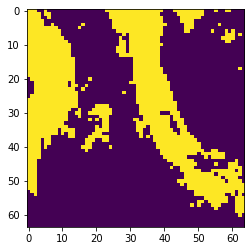

In [189]:
plt.imshow(ytrain>0)

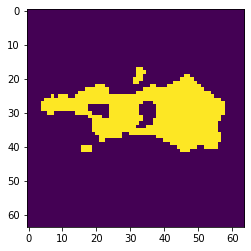

In [190]:
plt.imshow(sim_field>0)

In [160]:
np.argmax(h5['aver_precip_mask'][:][rows, cols], axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 9, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 0, 0, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 9, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 9,
       1, 9, 1, 1, 1, 1, 1, 0, 1, 1, 6, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,

In [165]:
df['true_label']= np.argmax(h5['aver_precip_mask'][:][rows, cols], axis=1)

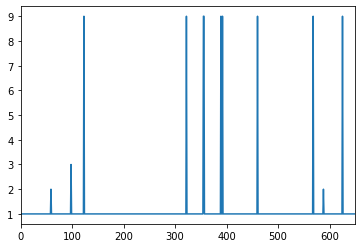

In [164]:
X.sim_classes.plot()

In [170]:
ytrain.shape

(64, 64)

In [171]:
event2H5.close()

In [195]:
event2H5= h5py.File('event1_processed.h5', 'w')
event2H5.create_dataset('true_rain_field', data=ytrain)
event2H5.create_dataset('sim_rain_field', data=rainField)
event2H5.create_dataset('true_class_field', data=np.argmax(h5['aver_precip_mask'][:], axis=2))
event2H5.create_dataset('sim_class_field', data= rainCls)
event2H5.create_dataset('rr_amsub', data= h5['rr_amsub'][:])
event2H5.create_dataset('lons', data=h5['lons'][:])
event2H5.create_dataset('lats', data=h5['lats'][:])
event2H5.close()